# Planteamiento del proyecto

Análisis de sentimientos en reseñas de películas

Tenemos un conjunto de datos sobre reseñas de 50 mil películas de IMDb. Queremos crear un modelo que, dada una review, prediga si es positiva o negativa.

El dataset a utilizar es el que aparece en la carpeta: [IMDb dataset](./IMDB%20Dataset.csv)

Objetivos del proyecto:
- Construir un modelo LSTM para clasificar las reviews.
- Optimizar el modelo.

## 1. Preprocesamiento de datos:

- **Eliminación de ruido:** Esto incluiría eliminar caracteres especiales, etiquetas HTML, signos de puntuación, números, etc.
- **Tokenización:** Dividir cada reseña en palabras o tokens individuales.
- **Eliminación de stop words:** Eliminar palabras comunes que no aportan mucho significado al análisis de sentimientos.
- **Normalización:** Convertir todas las palabras a minúsculas para que "Bueno" y "bueno" sean tratadas igual.
- **Lematización o stemming:** Reducir las palabras a su forma base para reducir la dimensionalidad del espacio de características y mejorar la generalización.
- **División del conjunto de datos:** Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba para evaluar el rendimiento del modelo.

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Cargamos los datos
df_review = pd.read_csv('IMDB Dataset.csv')
df_review.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to C:\Users\Jaime
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jaime
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jaime
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jaime
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Preprocesado de los datos
def preprocess_text(text):
    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)

    # Expandir contracciones comunes (opcional)
    contractions = {
        "can't": "cannot", "won't": "will not", "n't": " not",
        "'re": " are", "'s": " is", "'d": " would", "'ll": " will",
        "'t": " not", "'ve": " have", "'m": " am"
    }
    for contraction, expansion in contractions.items():
        text = re.sub(contraction, expansion, text)

    # Convertir a minúsculas
    text = text.lower()

    # Tokenización
    tokens = word_tokenize(text)

    # Eliminación de stop words y signos de puntuación
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Unir tokens en una cadena de texto
    clean_text = ' '.join(tokens)
    
    # Eliminar espacios en blanco adicionales
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()

    return clean_text

df_review['review'] = df_review['review'].apply(preprocess_text)
df_review.head(2)

In [8]:
# Mapear las etiquetas a valores numéricos
df_review['sentiment'] = df_review['sentiment'].map({'positive': 1, 'negative': 0})# Binary encoding

In [10]:
from sklearn.model_selection import train_test_split 

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_review['review'], 
                                                    df_review['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y secuenciación de texto con opciones mejoradas
vocab_size = 10000  # Limita el vocabulario a las 10,000 palabras más frecuentes
oov_token = '<OOV>'  # Token para palabras fuera del vocabulario

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 200  # Longitud máxima de secuencias
X_train_pad = pad_sequences(X_train_seq, maxlen = max_len, padding = 'post', truncating = 'post')
X_test_pad = pad_sequences(X_test_seq, maxlen = max_len, padding = 'post', truncating = 'post')


## 2. Representación de las reseñas:

- **Word embeddings (como Word2Vec, GloVe):** Representar cada palabra como un vector denso en un espacio semántico donde palabras similares están cercanas en términos de distancia euclidiana o coseno.

In [15]:
import numpy as np
from gensim.models import Word2Vec

In [14]:
# Entrenar el modelo Word2Vec o cargar un modelo preentrenado
sentences = [word_tokenize(review) for review in X_train]  # Utiliza X_train después del preprocesado
w2v_model = Word2Vec(sentences, vector_size=128, window=5, min_count=1, workers=4)
word_vectors = w2v_model.wv

In [16]:
# Obtener la matriz de embeddings
embedding_dim = 128
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        if word in word_vectors.key_to_index:
            embedding_matrix[i] = word_vectors.get_vector(word)

### 3. Entrenamiento del modelo:

- **Modelo de clasificación:**
    - Embedding: Convierte palabras en vectores densos.
    - Bidirectional LSTM: Captura contexto secuencial en ambas direcciones.
    - Dropout: Ayuda a prevenir sobreajuste.
    - LSTM: Captura dependencias a largo plazo en la secuencia procesada.
    - Dense: Combina características aprendidas y realiza clasificación final.
    - Sigmoid Output: Predice si la reseña es positiva o negativa.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [18]:
# Construir el modelo LSTM con mejoras
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False),
    Bidirectional(LSTM(128, return_sequences=True)),  # LSTM bidireccional para capturar contexto en ambas direcciones
    Dropout(0.5),  # Capa Dropout para evitar sobreajuste
    LSTM(64),  # Segunda capa LSTM para mayor profundidad
    Dropout(0.5),  # Otra capa Dropout
    Dense(32, activation='relu'),  # Capa densa con ReLU
    Dense(1, activation='sigmoid')  # Salida para clasificación binaria
])

c:\Users\Jaime Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# Compilar el modelo 
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 279ms/step - accuracy: 0.5301 - loss: 0.6839 - val_accuracy: 0.7529 - val_loss: 0.5595
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 152s 303ms/step - accuracy: 0.6568 - loss: 0.6171 - val_accuracy: 0.8560 - val_loss: 0.3470
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 152s 303ms/step - accuracy: 0.8479 - loss: 0.3723 - val_accuracy: 0.8705 - val_loss: 0.3172
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 154s 308ms/step - accuracy: 0.8734 - loss: 0.3088 - val_accuracy: 0.8774 - val_loss: 0.2954
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 160s 320ms/step - accuracy: 0.8862 - loss: 0.2783 - val_accuracy: 0.8832 - val_loss: 0.2849
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 151s 303ms/step - accuracy: 0.8923 - loss: 0.2696 - val_accuracy: 0.8850 - val_loss: 0.2750
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 156s 312ms/step - accuracy: 0.9035 - loss: 0.2440 - val_accuracy: 0.8919 - val_loss: 0.2645
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 285ms/step - accuracy: 0.9121 -

### 4. Evaluación de resultados:

- **Métricas de evaluación:** Utilizar métricas como precisión, recall, F1-score y matriz de confusión para evaluar el rendimiento del modelo en la clasificación de reseñas positivas y negativas.

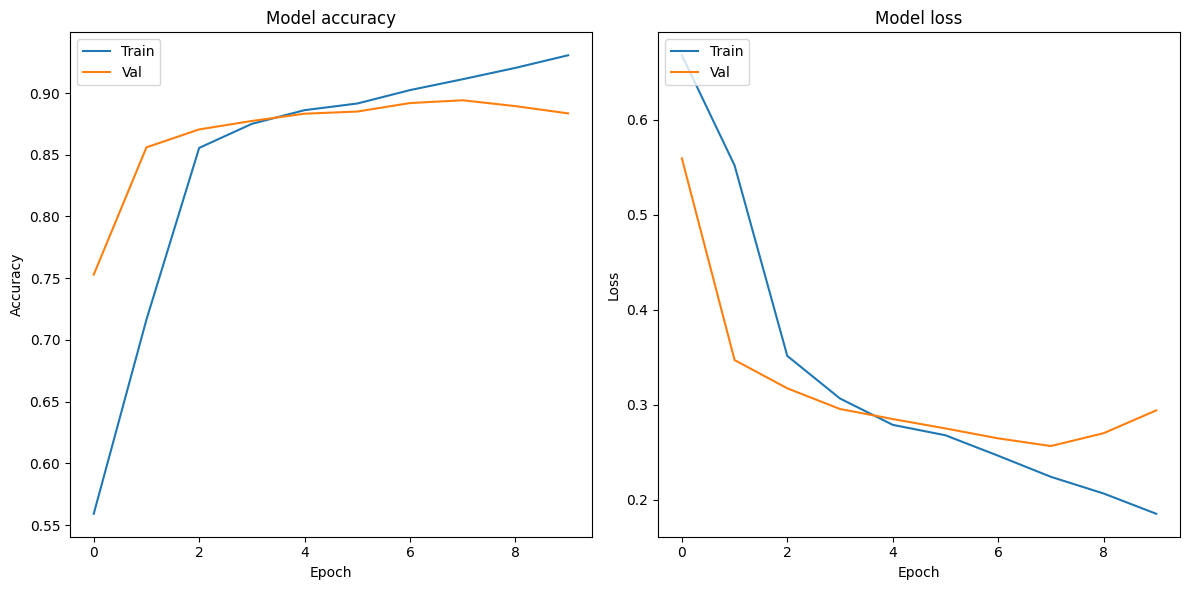

In [20]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of fitting your model
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
# Evaluamos el modelo lstm en los datos de test
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f"Accuracy of model_lstm: {accuracy_lstm}") 

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8832 - loss: 0.2954
Accuracy of model_lstm: 0.8823000192642212


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


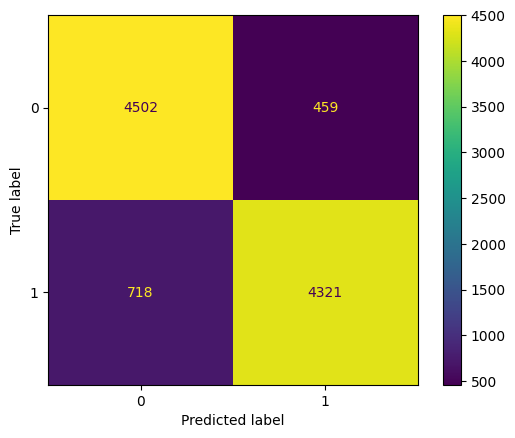

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluación del modelo
# Get the predictions for model_lstm
y_pred_lstm = model_lstm.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

# Compute the confusion matrix for model_lstm
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# Plot both confusion matrices side by side
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lstm)
disp.plot()

# Conclusión 

El modelo parece funcionar bastante bien, con más de 8800 predicciones correctas de 10,000. Sin embargo, hay áreas donde el modelo podría mejorar, como la reducción de los falsos negativos (718) y los falsos positivos (459). Estos valores sugieren que el modelo aún tiene margen para mejorar en la clasificación precisa de reseñas negativas y positivas.